<a href="https://colab.research.google.com/github/neerajac19/Book-Recommendation-System/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

Content

The Book-Crossing dataset comprises 3 files.

● Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

**A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications.**

Mainly three types of recommendation systems in machine learning based on filtering are used to suggest product and services to the consumers.

Content Filtering

Collaborative Filtering

Hybrid Filtering

1. Content Filtering:
In this algorithm, we try finding items look alike. Once we have item look like matrix,we can easily recommend alike items to a customer, who has purchased any item from the store.

2. Collaborative Filtering:
Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.This algorithm is very effective but takes a lot of time and resources.

3. Hybrid Filtering (Content Filtering + Collaborative Filtering):
Both Content Filtering & Collaborative Filtering is used for the purpose. you-tube uses this algorithm for their strong recommendation system.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import random
import sklearn
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import csr_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the books dataset
d1 = pd.read_csv('/content/drive/MyDrive/Book Recommendation System-Neeraja C/Copy of Books.csv')

In [4]:
books = d1.copy()

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


 **Data Cleaning**

In [6]:
## Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [7]:
## Checking for null values
books.isnull().sum() 


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [8]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [9]:
books.loc[books['Publisher'].isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [10]:
books.at[187689 ,'Book-Author'] = 'Other'

books.at[128890 ,'Publisher'] = 'Other'
books.at[129037 ,'Publisher'] = 'Other'


In [11]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [12]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [13]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [14]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'


In [15]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)


In [16]:
print(sorted(list(books['Year-Of-Publication'].unique())))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [17]:
from collections import Counter

In [18]:
## Replacing Invalid years with max year
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]



[2002]

In [19]:
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [20]:
## Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)


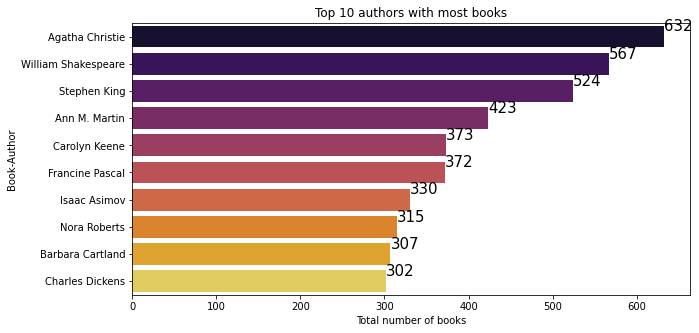

In [21]:
most_books = books.groupby('Book-Author')['Book-Title'].count().reset_index().sort_values('Book-Title', ascending=False).head(10).set_index('Book-Author')
plt.figure(figsize=(10,5))
ax = sns.barplot(most_books['Book-Title'], most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [22]:
#importing users dataset
d2 = pd.read_csv('/content/drive/MyDrive/Book Recommendation System-Neeraja C/Copy of Users.csv')

In [23]:
users = d2.copy()

In [24]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


 **Data Cleaning**

In [25]:
## Checking null values
print(users.isna().sum())     

User-ID          0
Location         0
Age         110762
dtype: int64


In [26]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))


[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

<Figure size 1440x1440 with 0 Axes>

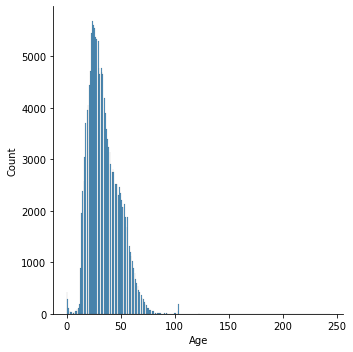

In [27]:
plt.figure(figsize=(20, 20))
sns.displot(users.Age)

*From the given distplot we can see that we have outliers in the Age*

In [28]:
#taking required ages
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]


In [29]:
#calculating mean
mean = round(required['Age'].mean())   
mean

35

In [30]:
users.loc[users['Age'] > 80, 'Age'] = mean    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(mean)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [31]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)


In [32]:
#importing third dataset
d3 = pd.read_csv('/content/drive/MyDrive/Book Recommendation System-Neeraja C/Copy of Ratings.csv')

In [33]:
ratings = d3.copy()

In [34]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


 **Data Cleaning**

In [35]:
## Checking for null values
ratings.isnull().sum() 



User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [36]:
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)


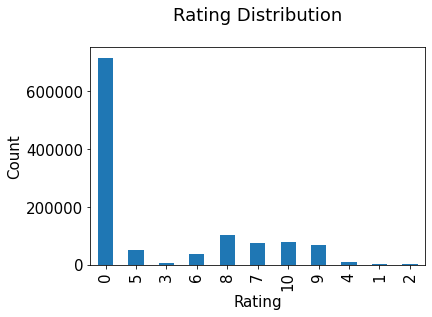

In [37]:
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [38]:
#removing unexprerianced users
ratings_counts=ratings['User-ID'].value_counts()
ratings=ratings[ratings['User-ID'].isin(ratings_counts[ratings_counts>=200].index)]
counts=ratings['Book-Rating'].value_counts()
ratings=ratings[ratings['Book-Rating'].isin(counts[counts>=100].index)]

In [39]:
#merging book_df and ratings_df
book_rating_df = pd.merge(books, ratings, on='ISBN')
book_rating_df=book_rating_df.drop(['Year-Of-Publication','Book-Author'],axis=1)
book_rating_df.head()



,ISBN,Book-Title,Publisher,User-ID,Book-Rating
0,0002005018,Clara Callan,HarperFlamingo Canada,11676,8
1,0002005018,Clara Callan,HarperFlamingo Canada,85526,0
2,0002005018,Clara Callan,HarperFlamingo Canada,96054,0
3,0002005018,Clara Callan,HarperFlamingo Canada,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Farrar Straus Giroux,110912,10


In [40]:
Rating_count = book_rating_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
Rating_count.rename(columns={'Book-Rating':'Rating Count'},inplace=True)
Rating_count.sort_values('Rating Count',ascending=False)

,Book-Title,Rating Count
156613,Wild Animus,365
19172,Bridget Jones's Diary,278
130477,The Lovely Bones: A Novel,272
133147,The Notebook,242
134156,The Pelican Brief,236
...,...,...
38115,Edit yourself: A manual for everyone who works...,1
38116,"Edith Ann: My Life, So Far",1
93250,Portrait of the Artist as a Young Man (Twentie...,1
93249,Portrait of the Artist as a Young Dog,1


In [41]:
#calculating average rating for each book
Avg_Rating_count = book_rating_df.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
Avg_Rating_count.rename(columns={'Book-Rating':'Avg Rating'},inplace=True)
Avg_Rating_count.head(10)

,Book-Title,Avg Rating
0,A Light in the Storm: The Civil War Diary of ...,4.500000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,Beyond IBM: Leadership Marketing and Finance ...,0.000000
4,Clifford Visita El Hospital (Clifford El Gran...,0.000000
5,Dark Justice,10.000000
6,Deceived,0.000000
7,Earth Prayers From around the World: 365 Pray...,8.333333
8,Final Fantasy Anthology: Official Strategy Gu...,3.333333
9,Flight of Fancy: American Heiresses (Zebra Ba...,0.000000


In [42]:
most_rated_books_df = Rating_count.merge(Avg_Rating_count,on='Book-Title')

In [43]:
most_rated_books_df = most_rated_books_df.sort_values('Avg Rating',ascending=False).head(50)
most_rated_books_df

,Book-Title,Rating Count,Avg Rating
102153,Schoolhouse Rock! : The Official Guide,2,10.0
54313,Her Mother'S Keeper #20 (Nora Roberts Flowers...,1,10.0
89557,PHP Essentials,1,10.0
103572,Self-Editing for Fiction Writers,1,10.0
147844,Traditional Japanese Poetry: An Anthology,1,10.0
103576,Self-Esteem Therapy (Elf Self Help),1,10.0
89542,PERSONALIZED PERFUMES: MORE THAN 40 RECIPES MA...,1,10.0
10062,Animal Alphabet,1,10.0
133173,The Nuclear War Game,1,10.0
89528,PENNY WHISTLE HALLOWEEN BOOK,1,10.0


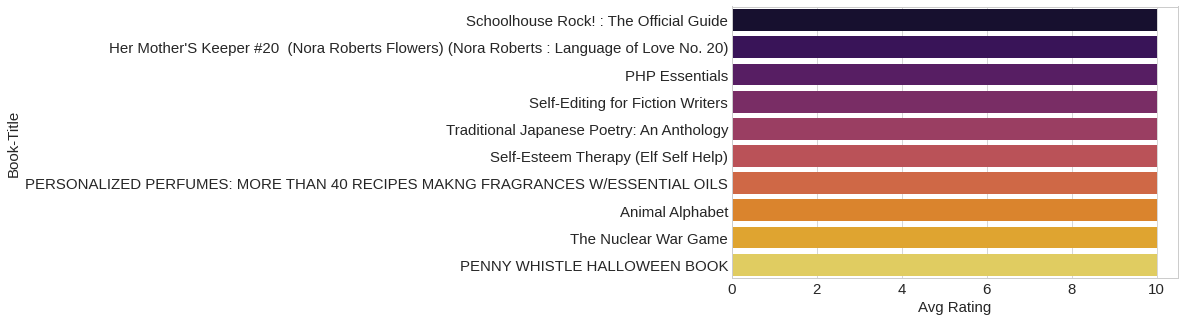

In [44]:

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 5))
data=most_rated_books_df.head(10)
sns.barplot(x="Avg Rating", y="Book-Title", data=data, palette='inferno')

Text(0.5, 0, 'Average rating')

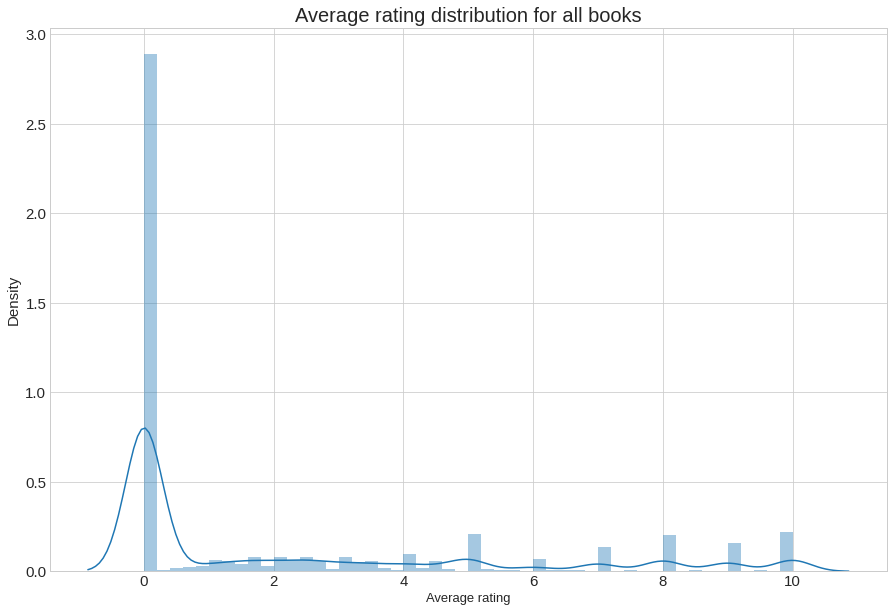

In [45]:
Avg_Rating_count['Avg Rating'] = Avg_Rating_count['Avg Rating'].astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(Avg_Rating_count["Avg Rating"],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

### **Colloboarative System**

In [46]:
x = book_rating_df.groupby('User-ID').count()['Book-Rating']>200
exp_users = x[x].index

In [47]:
filtered_rating_users = book_rating_df[book_rating_df['User-ID'].isin(exp_users)]
filtered_rating_users

,ISBN,Book-Title,Publisher,User-ID,Book-Rating
0,0002005018,Clara Callan,HarperFlamingo Canada,11676,8
1,0002005018,Clara Callan,HarperFlamingo Canada,85526,0
2,0002005018,Clara Callan,HarperFlamingo Canada,96054,0
3,0002005018,Clara Callan,HarperFlamingo Canada,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Farrar Straus Giroux,110912,10
...,...,...,...,...,...
488737,0231128444,Slow Food(The Case For Taste),Columbia University Press,275970,0
488738,0520242335,Strong Democracy : Participatory Politics for ...,University of California Press,275970,0
488739,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Running Press Book Publishers,275970,0
488740,1582380805,Tropical Rainforests: 230 Species in Full Colo...,Golden Guides from St. Martin's Press,275970,0


In [48]:
y = filtered_rating_users.groupby('Book-Title').count()['Book-Rating']>50
famous_books = y[y].index

In [49]:
final_ratings = filtered_rating_users[filtered_rating_users['Book-Title'].isin(famous_books)].reset_index()
final_ratings_df=pd.DataFrame(final_ratings,columns=['index','ISBN','Book-Title','Publisher','User-ID','Book-Rating'])
final_ratings_df.head()

,index,ISBN,Book-Title,Publisher,User-ID,Book-Rating
0,7,0399135782,The Kitchen God's Wife,Putnam Pub Group,11676,9
1,8,0399135782,The Kitchen God's Wife,Putnam Pub Group,36836,0
2,9,0399135782,The Kitchen God's Wife,Putnam Pub Group,46398,9
3,10,0399135782,The Kitchen God's Wife,Putnam Pub Group,113270,0
4,11,0399135782,The Kitchen God's Wife,Putnam Pub Group,113519,0


In [50]:
train_df,test_df=train_test_split(final_ratings_df,test_size=0.20)
train_df.shape

(45788, 6)

In [51]:
test_df.shape

(11448, 6)

In [52]:
final_df = train_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
final_df.fillna(0,inplace=True)
columns=final_df.columns

In [53]:
final_df = final_df.values
final_df[:10]

array([[ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [54]:
final_df.shape

(679, 810)

In [55]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(final_df, k = NUMBER_OF_FACTORS_MF)

In [56]:
U.shape

(679, 15)

In [57]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [58]:
Vt.shape

(15, 810)

In [59]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 0.44878325,  0.49282858,  0.11457678, ...,  0.55444075,
         0.25641328, -0.09256465],
       [-0.4390338 ,  0.38524163,  0.33719281, ...,  0.76229384,
         0.47786765,  0.05254179],
       [-0.41226332,  0.79984219, -0.27085882, ..., -0.03496737,
         0.37382886, -0.08419676],
       ...,
       [ 0.25770323,  0.00831603,  0.10921059, ..., -0.01925586,
        -0.1337061 ,  0.18094383],
       [-0.15230417, -0.12749128,  0.04573705, ...,  0.17991585,
         0.06327799,  0.03768244],
       [ 0.02285364, -0.07093457, -0.17798468, ..., -0.10458005,
         0.18761569,  0.02833549]])

In [60]:
all_user_predicted_ratings.shape

(679, 810)

In [61]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = columns)
cf_preds_df.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
0,0.448783,0.492829,0.114577,-0.007344,0.096980,0.689120,0.193920,0.975358,0.418842,0.122006,...,1.105589,0.506282,0.494970,0.011366,-0.841817,0.015194,0.059066,0.554441,0.256413,-0.092565
1,-0.439034,0.385242,0.337193,0.005278,0.247660,0.755007,0.127699,0.005011,0.367953,0.622686,...,0.561557,0.816928,0.506497,-1.562690,0.844629,0.326366,-0.084293,0.762294,0.477868,0.052542
2,-0.412263,0.799842,-0.270859,-0.177924,-0.403255,-0.477337,0.027620,0.507361,0.533552,0.981877,...,0.551519,-0.249477,1.043272,-0.095307,0.106120,0.742905,0.192271,-0.034967,0.373829,-0.084197
3,0.095640,0.027026,0.058589,0.044717,0.028190,0.155482,0.003866,0.142002,0.000210,0.035446,...,0.014394,0.156391,0.020084,-0.077454,0.065968,0.012350,0.054672,0.029944,0.005904,0.001391
4,0.434013,0.280878,0.387201,0.120392,0.027411,0.277127,0.011129,0.537669,0.065617,0.446318,...,0.020978,0.544873,0.133989,-0.729190,-0.533843,0.283959,0.366031,0.014873,0.067181,0.041944


In [62]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book-Title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Book-Title', 
                                                          right_on = 'Book-Title')


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, books)

In [64]:
cf_recommender_model

In [71]:
#Indexing by personId to speed up the searches during evaluation
final_indexed_df = final_ratings_df.set_index('ISBN')
train_indexed_df = train_df.set_index('ISBN')
test_indexed_df = test_df.set_index('ISBN')

In [72]:
def get_items_interacted(person_id, ratings_df):
    rating_items = ratings_df.loc[person_id]['Book-Title']
    return set(rating_items if type(rating_items) == pd.Series else [rating_items])

In [77]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, final_indexed_df)
        all_items = set(books['Book-Title'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['Book-Title']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['Book-Title'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['Book-Title'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Book-Title'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Book-Title'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
model_evaluator = ModelEvaluator()  


In [65]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(final_df)
similarity_scores.shape

(679, 679)

In [66]:
def recommend(book):
    book_index = np.where(final_df.index == book)[0][0]
    distances = similarity_scores[book_index]
    book_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in book_list:
        print(final_df.index[i[0]])